In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import urllib.request
import zipfile

# typing
from typing import List, Callable, Dict

In [2]:
#download zip from url
def download_url(download_path: Path, url: str):
    urllib.request.urlretrieve(url, filename=download_path)

        
def download_dataset(download_path: Path, url: str):
    print("Downloading dataset...")
    download_url(url=url, download_path=download_path)
    print("Download complete!")

def extract_dataset(download_path: Path, extract_path: Path):
    print("Extracting dataset")
    with zipfile.ZipFile(download_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Extraction completed!")


In [3]:
url = "https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip"
dataset_name = "dependency_treebank"

print(f"Current work directory: {Path.cwd()}")
dataset_folder = Path.cwd().joinpath("Datasets")

if not dataset_folder.exists():
    dataset_folder.mkdir(parents=True)

dataset_zip_path = dataset_folder.joinpath("dependency_treebank.zip")
dataset_path = dataset_folder.joinpath(dataset_name)

if not dataset_zip_path.exists():
    download_dataset(dataset_zip_path, url)

if not dataset_path.exists():
    extract_dataset(dataset_zip_path, dataset_folder)

Current work directory: c:\Users\giorg\Documents\AI23\NLP\Assignment1


In [4]:
#create method to encode dataset into pd.DataFrame
df_rows = []
dataset_folder= dataset_folder.joinpath(dataset_name)
def encode_dataset(dataset_folder: Path):
    count=0
    for file_path in dataset_folder.glob("*.dp"):
        with file_path.open(mode="r", encoding="utf-8") as dp_file:
            dp = dp_file.read()
            id = file_path.stem.split("_")[1]
            file_name =int(id)
            dp = dp.split("\n")
            for el in dp:
                if el != "":
                    word= el.split("\t")[0]
                    #print(word)
                    pos= el.split("\t")[1]
                    #we don't need the third column but we have to split it to avoid errors
                    n = el.split("\t")[2]
                    
                    df_row = {
                        "word": word,
                        "pos": pos,
                        "sentence": count,
                        "id": file_name
                    }
                    if word in [".", "\n", "!", "?"]:
                        count += 1
                    df_rows.append(df_row)

encode_dataset(dataset_folder)
print(df_rows[0:19])


[{'word': 'Pierre', 'pos': 'NNP', 'sentence': 0, 'id': 1}, {'word': 'Vinken', 'pos': 'NNP', 'sentence': 0, 'id': 1}, {'word': ',', 'pos': ',', 'sentence': 0, 'id': 1}, {'word': '61', 'pos': 'CD', 'sentence': 0, 'id': 1}, {'word': 'years', 'pos': 'NNS', 'sentence': 0, 'id': 1}, {'word': 'old', 'pos': 'JJ', 'sentence': 0, 'id': 1}, {'word': ',', 'pos': ',', 'sentence': 0, 'id': 1}, {'word': 'will', 'pos': 'MD', 'sentence': 0, 'id': 1}, {'word': 'join', 'pos': 'VB', 'sentence': 0, 'id': 1}, {'word': 'the', 'pos': 'DT', 'sentence': 0, 'id': 1}, {'word': 'board', 'pos': 'NN', 'sentence': 0, 'id': 1}, {'word': 'as', 'pos': 'IN', 'sentence': 0, 'id': 1}, {'word': 'a', 'pos': 'DT', 'sentence': 0, 'id': 1}, {'word': 'nonexecutive', 'pos': 'JJ', 'sentence': 0, 'id': 1}, {'word': 'director', 'pos': 'NN', 'sentence': 0, 'id': 1}, {'word': 'Nov.', 'pos': 'NNP', 'sentence': 0, 'id': 1}, {'word': '29', 'pos': 'CD', 'sentence': 0, 'id': 1}, {'word': '.', 'pos': '.', 'sentence': 0, 'id': 1}, {'word': '

In [5]:
folder = Path.cwd().joinpath("Datasets", "Dataframes", dataset_name)
if not folder.exists():
    folder.mkdir(parents=True)

In [6]:
#divide df into sentences and pos
df = pd.DataFrame(df_rows, columns=['word', 'pos', 'sentence','id'])
df.head()


,word,pos,sentence,id
0,Pierre,NNP,0,1
1,Vinken,NNP,0,1
2,",",",",0,1
3,61,CD,0,1
4,years,NNS,0,1


In [7]:


#split the dataset into train, validation and test
#train contains the words that have value of sentence lower than 100, 
# validation the next 50 and test the rest
#train_df if sentence < 100
train_interval = (0, 100)  # Sentences 0 to 99
val_interval = (100, 150) # Sentences 100 to 149
test_interval = (150, 200) # Sentences 150 to 199

# Split DataFrame
train_df = df[(df['id'] >= train_interval[0]) & (df['id'] < train_interval[1])]
val_df = df[(df['id'] >= val_interval[0]) & (df['id'] < val_interval[1])]
test_df = df[(df['id'] >= test_interval[0]) & (df['id'] < test_interval[1])]


X_train_raw = train_df.groupby('sentence').word.apply(list).reset_index()['word']
X_val_raw = val_df.groupby('sentence').word.apply(list).reset_index()['word']
X_test_raw = test_df.groupby('sentence').word.apply(list).reset_index()['word']

y_train_raw = train_df.groupby('sentence').pos.apply(list).reset_index()['pos']
y_val_raw = val_df.groupby('sentence').pos.apply(list).reset_index()['pos']
y_test_raw = test_df.groupby('sentence').pos.apply(list).reset_index()['pos']


# type of X_train_raw
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)
#print last element of train_df
print(X_train_raw)


(46451, 4)
(31924, 4)
(15709, 4)
0       [Pierre, Vinken, ,, 61, years, old, ,, will, j...
1       [Mr., Vinken, is, chairman, of, Elsevier, N.V....
2       [Rudolph, Agnew, ,, 55, years, old, and, forme...
3       [A, form, of, asbestos, once, used, to, make, ...
4       [The, asbestos, fiber, ,, crocidolite, ,, is, ...
                              ...                        
1912    [The, U.S., Chamber, of, Commerce, ,, still, o...
1913    [Zenith, Data, Systems, Corp., ,, a, subsidiar...
1914    [Rockwell, International, Corp., won, a, $, 13...
1915    [Martin, Marietta, Corp., was, given, a, $, 29...
1916    [Federal, Data, Corp., got, a, $, 29.4, millio...
Name: word, Length: 1917, dtype: object


In [8]:
'''#create train validation and test datasets
train_df = df[df['id'] <= 100]
validation_df = df[(df['id'] > 100) & (df['id'] <= 150)]
test_df = df[df['id'] > 150]
'''

"#create train validation and test datasets\ntrain_df = df[df['id'] <= 100]\nvalidation_df = df[(df['id'] > 100) & (df['id'] <= 150)]\ntest_df = df[df['id'] > 150]\n"

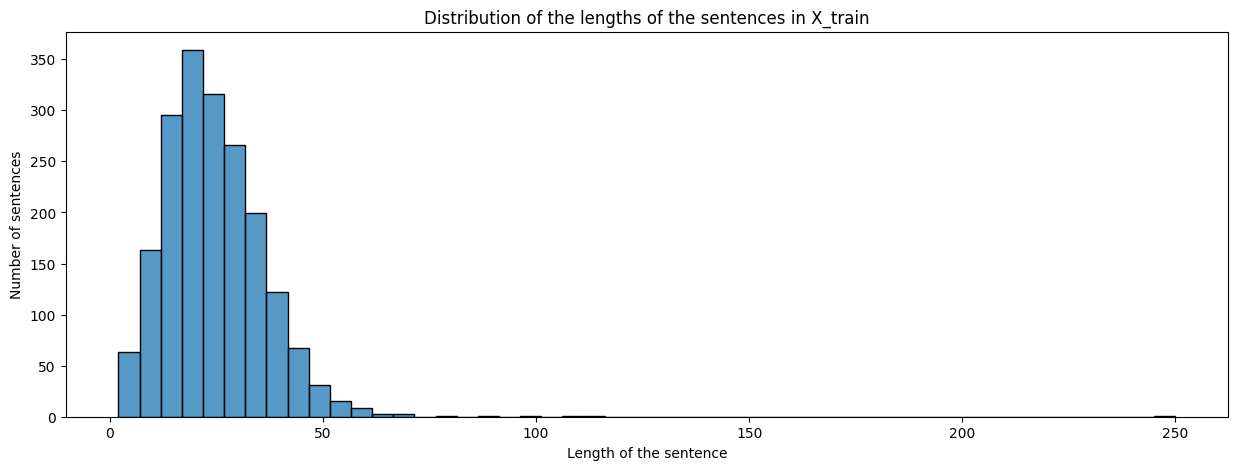

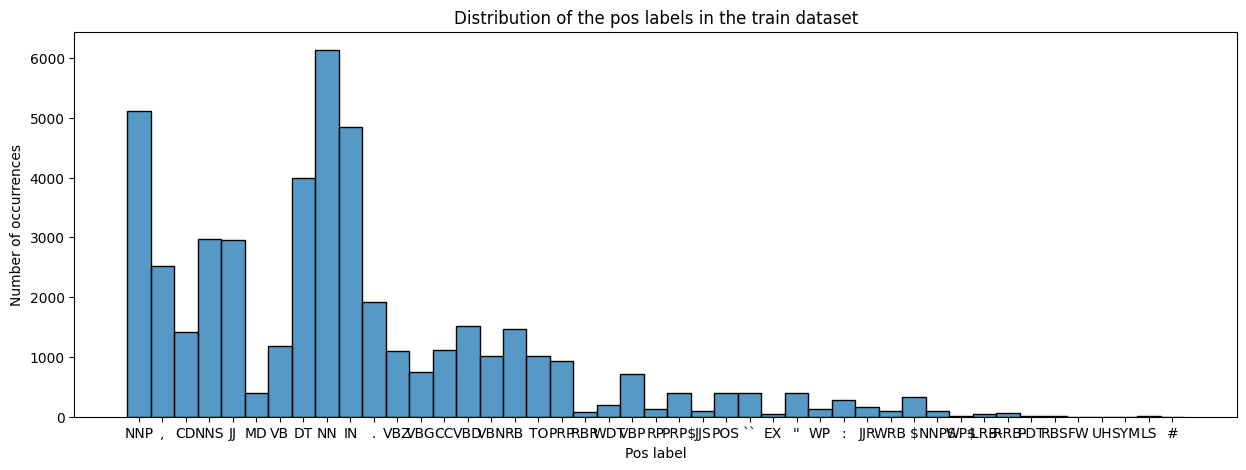

In [9]:
#plot the distribution of the lengths of the sentences
plt.figure(figsize=(15, 5))
sns.histplot([len(sentence) for sentence in X_train_raw], bins=50)
plt.title("Distribution of the lengths of the sentences in X_train")
plt.xlabel("Length of the sentence")
plt.ylabel("Number of sentences")
plt.show()

#plot the distribution of the pos labels in the train dataset
plt.figure(figsize=(15, 5))
sns.histplot(train_df['pos'])
plt.title("Distribution of the pos labels in the train dataset")
plt.xlabel("Pos label")
plt.ylabel("Number of occurrences")
plt.show()


*data exploration*

# Text Encoding

In [10]:
import gensim
import gensim.downloader as gloader

EMB_DIM = 50
embedding_model = gloader.load(f'glove-wiki-gigaword-{EMB_DIM}')

#print the number of words in the model


In [11]:
print(f"Number of words in the model: {len(embedding_model.index_to_key)}")


Number of words in the model: 400000


# useful classes 
maybe a dataset class


### vocabulary class

In [12]:
#create vocabulary using keras tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from typing import List

def create_vocabulary(sentences: List[List[str]]) -> Tokenizer:
    tokenizer = Tokenizer(filters="")
    tokenizer.fit_on_texts(sentences)
    return tokenizer

train_tokenizer = create_vocabulary(X_train_raw)
print(f"Number of words in the vocabulary: {len(train_tokenizer.word_index)}")
pos_tokenizer = create_vocabulary(y_train_raw)
print(f"Number of pos in the vocabulary: {len(pos_tokenizer.word_index)}")


#encode the sentences
def encode_sentences(tokenizer: Tokenizer, sentences: List[List[str]]) -> np.ndarray:
    encoded_sentences = tokenizer.texts_to_sequences(sentences)
    return encoded_sentences

X_train = encode_sentences(train_tokenizer, X_train_raw)
X_val = encode_sentences(train_tokenizer, X_val_raw)
X_test = encode_sentences(train_tokenizer, X_test_raw)

y_train = encode_sentences(pos_tokenizer, y_train_raw)
y_val = encode_sentences(pos_tokenizer, y_val_raw)
y_test = encode_sentences(pos_tokenizer, y_test_raw)

#print the first sentence
print(X_train[0])
print(y_train[0])

# Pad the sequences
MAX_SEQ_LENGTH = 100



Number of words in the vocabulary: 7304
Number of pos in the vocabulary: 45
[3388, 2281, 1, 1722, 64, 371, 1, 39, 1345, 2, 189, 23, 6, 1105, 260, 693, 2282, 3]
[2, 2, 7, 11, 5, 6, 7, 20, 12, 4, 1, 3, 4, 6, 1, 2, 11, 8]


In [13]:
#words padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_SEQ_LENGTH = 114

X_train_pad = pad_sequences(X_train, maxlen=MAX_SEQ_LENGTH, padding='post')
y_train_pad = pad_sequences(y_train, maxlen=MAX_SEQ_LENGTH, padding='post')

X_val_pad = pad_sequences(X_val, maxlen=MAX_SEQ_LENGTH, padding='post')
y_val_pad = pad_sequences(y_val, maxlen=MAX_SEQ_LENGTH, padding='post')

X_test_pad = pad_sequences(X_test, maxlen=MAX_SEQ_LENGTH, padding='post')
y_test_pad = pad_sequences(y_test, maxlen=MAX_SEQ_LENGTH, padding='post')

print(f"X_train_pad: {X_train_pad.shape}")
print(f"y_train_pad: {y_train_pad.shape}")

print(f"X_val_pad: {X_val_pad.shape}")
print(f"y_val_pad: {y_val_pad.shape}")

print(f"X_test_pad: {X_test_pad.shape}")
print(f"y_test_pad: {y_test_pad.shape}")




X_train_pad: (1917, 114)
y_train_pad: (1917, 114)
X_val_pad: (1310, 114)
y_val_pad: (1310, 114)
X_test_pad: (647, 114)
y_test_pad: (647, 114)


In [14]:
def check_OOV_terms(embedding_model: gensim.models.keyedvectors.KeyedVectors,
                    word_listing: List[str]):
    """
    Checks differences between pre-trained embedding model vocabulary
    and dataset specific vocabulary in order to highlight out-of-vocabulary terms.

    :param embedding_model: pre-trained word embedding model (gensim wrapper)
    :param word_listing: dataset specific vocabulary (list)

    :return
        - list of OOV terms
    """
    embedding_vocabulary = set(embedding_model.key_to_index.keys())
    oov = set(word_listing).difference(embedding_vocabulary)
    return list(oov)

oov_terms = check_OOV_terms(embedding_model, train_tokenizer.word_index.keys())
oov_percentage = float(len(oov_terms)) * 100 / len(train_tokenizer.word_index)
print(f"Total OOV terms: {len(oov_terms)} ({oov_percentage:.2f}%)")

Total OOV terms: 353 (4.83%)


Now we can use the gloVe embeddings to create the embedding matrix using both our vocabulary created by tokenizer and the GloVe Embeddings. in this case we have two solutions: use the GloVe embedding or a random one.
We have decided to structure the matrix in this way:
- if the *word* is in the GloVe dictionary we use the embedding provided by GloVe
- otherwise we implement a random matrix

In [15]:
#create the embedding matrix
def create_embedding_matrix(embedding_model: gensim.models.keyedvectors.KeyedVectors,
                            embedding_dimension: int,
                            word_to_idx: Dict[str, int],
                            vocab_size: int,
                            oov_terms: List[str]) -> np.ndarray:
    
    embedding_matrix = np.zeros((vocab_size, embedding_dimension), dtype=np.float32)
    #oov_static_embedding = np.random.uniform(low=-0.05, high=0.05, size=embedding_dimension)
    for word, idx in word_to_idx.items():
        try:
            embedding_vector = embedding_model[word]
        except (KeyError, TypeError):
            oov_terms.append(word)
            embedding_vector = np.random.uniform(low=-0.05, high=0.05, size=embedding_dimension)

        embedding_matrix[idx] = embedding_vector
    print(f"OOV terms: {len(oov_terms)}")
    return embedding_matrix

In [16]:
#test the method
vocab_size = len(train_tokenizer.word_index)+1
embedding_matrix = create_embedding_matrix(embedding_model, EMB_DIM, train_tokenizer.word_index, vocab_size, oov_terms)
print(f"Embedding matrix shape: {embedding_matrix.shape}")


OOV terms: 706
Embedding matrix shape: (7305, 50)


In [17]:
#one hot encoding for the pos
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train_pad, num_classes=len(pos_tokenizer.word_index)+1)
y_val_cat = to_categorical(y_val_pad, num_classes=len(pos_tokenizer.word_index)+1)
y_test_cat = to_categorical(y_test_pad, num_classes=len(pos_tokenizer.word_index)+1)

print(f"y_train_cat shape: {y_train_cat.shape}")
print(f"y_val_cat shape: {y_val_cat.shape}")
print(f"y_test_cat shape: {y_test_cat.shape}")

y_train_cat shape: (1917, 114, 46)
y_val_cat shape: (1310, 114, 46)
y_test_cat shape: (647, 114, 46)


In [18]:
#model creation
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam

#By specifying the input_shape argument in the first layer (Embedding layer), 
# we provide the model with the expected shape of the input data. 
# This enables the model to correctly calculate the number of parameters.
#print the shape of the embedding matrix
# Create the model

tags = y_train_cat.shape[2]
def base_model_creator(tags=tags, lstm_units=256, dropout_rate=0.1, recurrent_dropout_rate=0.1, learning_rate=0.01):
    model = Sequential()
    model.add(keras.Input(shape=(MAX_SEQ_LENGTH,)))
    model.add(Embedding(input_dim=len(train_tokenizer.word_index)+1,
                        output_dim=EMB_DIM,
                        mask_zero=True,
                        embeddings_initializer=keras.initializers.Constant(embedding_matrix),
                        weights=[embedding_matrix], trainable=False))
    model.add(Bidirectional(LSTM(units=lstm_units, return_sequences=True, recurrent_dropout=recurrent_dropout_rate, dropout=dropout_rate)))
    model.add(Dense(units=tags, activation='softmax'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#'batch_size': 32, 'dropout_rate': 0.1, 'learning_rate': 0.01, 'lstm_units': 256, 'recurrent_dropout_rate': 0.1

In [19]:
def mod_1_creator(tags=tags, lstm_units=256, dropout_rate=0.1, recurrent_dropout_rate=0.1, learning_rate=0.01):
    model = Sequential()
    model.add(keras.Input(shape=(100,)))
    model.add(Embedding(input_dim=len(train_tokenizer.word_index)+1,
                        output_dim=EMB_DIM,
                        mask_zero=True,
                        embeddings_initializer=keras.initializers.Constant(embedding_matrix),
                        weights=[embedding_matrix], trainable=False))
    
    model.add(Bidirectional(LSTM(units=lstm_units, return_sequences=True, recurrent_dropout=recurrent_dropout_rate, dropout=dropout_rate)))
    model.add(Bidirectional(LSTM(units=int(lstm_units/2), return_sequences=True, recurrent_dropout=recurrent_dropout_rate, dropout=dropout_rate)))
    model.add(Dense(units=tags, activation='softmax'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [20]:
def mod_2_creator(tags=tags, lstm_units=256, dropout_rate=0.1, recurrent_dropout_rate=0.1, learning_rate=0.01):
    model = Sequential()
    model.add(keras.Input(shape=(100,)))
    model.add(Embedding(input_dim=len(train_tokenizer.word_index)+1,
                        output_dim=EMB_DIM,
                        mask_zero=True,
                        embeddings_initializer=keras.initializers.Constant(embedding_matrix),
                        weights=[embedding_matrix], trainable=False))
    
    model.add(Bidirectional(LSTM(units=lstm_units, return_sequences=True, recurrent_dropout=recurrent_dropout_rate, dropout=dropout_rate)))
    model.add(Dense(units=MAX_SEQ_LENGTH, activation='relu'))
    model.add(Dense(units=tags, activation='softmax'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [21]:
baseline_model = base_model_creator()
hystory = baseline_model.fit(X_train_pad, y_train_cat, validation_data=(X_val_pad, y_val_cat), epochs=20, batch_size=32)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 237ms/step - accuracy: 0.1556 - loss: 2.0562 - val_accuracy: 0.0678 - val_loss: 4.8182
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 192ms/step - accuracy: 0.1720 - loss: 0.5908 - val_accuracy: 0.0717 - val_loss: 5.4555
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 209ms/step - accuracy: 0.1880 - loss: 0.3900 - val_accuracy: 0.0732 - val_loss: 5.9072
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 204ms/step - accuracy: 0.1946 - loss: 0.2684 - val_accuracy: 0.0735 - val_loss: 6.2599
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 205ms/step - accuracy: 0.1994 - loss: 0.2024 - val_accuracy: 0.0741 - val_loss: 6.6545
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 236ms/step - accuracy: 0.2003 - loss: 0.1534 - val_accuracy: 0.0682 - val_loss: 7.1388
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 232ms/step - accuracy: 0.2081 - loss: 0.1191 - val_accuracy: 0.0688 - val_loss: 7.3670
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 215ms/step - accuracy: 0.2101 - loss: 0.0897 - val_accu

During metric computation we are going to ignore padding sequence, OOV ['UNK'] and punctation marks.
Punctation includes:
- , comma
- . dot
- : colon
- `` backticks
- -lrb- and -rrb- which are the tags for rounded brackets
- '#' and $
- ls that stands for list item markers
- sym which is the tag for symbols



In [ ]:
pos_to_idx = pos_tokenizer.word_index
idx_to_pos = {i: w for w, i in pos_to_idx.items()}

punct_pos_ = [',', '.', '?', '!', '"', "'", '-', ':', ';' , '<UNK>', '-lrb-','-rrb-', '[', ']', '{', '}', '<', '>', '#', '$', '``', 'ls', 'sym']
punct_pos__idx = []
for tag in punct_pos_:
    try:
        punct_pos__idx.append(pos_to_idx[tag])
    except KeyError:
        continue

In [ ]:
from sklearn.metrics import f1_score

def macro_f1_score(y_true, y_pred):
    labels=[pos_to_idx[tag] for tag in pos_to_idx.keys() if tag not in punct_pos__idx]
    y_true = np.argmax(y_true, axis=-1)
    y_pred = np.argmax(y_pred, axis=-1)
    print(y_true.shape)
    print(y_pred.shape)

    #flatten the arrays
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    y_no_punct = []
    y_no_punct_pred = []

    # remove punctuation tags from y_true
    for i in range(len(y_true)):
        if y_true[i] not in punct_pos__idx and y_true[i] != 0:
            y_no_punct.append(y_true[i])
            y_no_punct_pred.append(y_pred[i])

    return f1_score(y_no_punct, y_no_punct_pred, average='weighted', labels=labels, zero_division=0)

In [ ]:
#fit, evaluate and save the model for different seeds
seeds = [18, 45, 180, 250]
def run_models_seeds(model: str, seeds= [45]):
    model_recaps = []
    for seed in seeds:
        print(f"Running model for seed: {seed}")
        np.random.seed(seed)
        if model == "model_1":
            name = "model_1"
            model = mod_1_creator()
        elif model == "model_2":
            name = "model_2"
            model = mod_2_creator()
        else:
            name = "base_model"
            model = base_model_creator()
        
        print(f"Model: {name} with seed: {seed}")


        hst=model.fit(X_train_pad, y_train_cat, validation_data=(X_val_pad, y_val_cat), epochs=20, batch_size=32)
        
        scores = model.evaluate(X_test_pad, y_test_cat, verbose=1, batch_size=32, ) 
        print(f"Scores: {scores}")

        predictions_one_hot_encode = model.predict(X_val_pad)
        print(predictions_one_hot_encode)
        predictions = np.argmax(predictions_one_hot_encode, axis=-1)
        
        
        macro_f1=macro_f1_score(y_val_cat, model.predict(X_val_pad))
        print(f"Macro F1 score: {macro_f1_score}")
        #model.save(f"{name}_seed_{seed}.h5")

        model_recap = {
            'name': name,
            'model': model,
            'history': hst,
            'scores': scores,
            'macro_f1': macro_f1,
            'seed': seed
        }

        model_recaps.append(model_recap)


    return model_recaps



In [ ]:
baseline_recap = run_models_seeds("base_model")

Running model for seed: 45
Model: base_model with seed: 45
Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - accuracy: 0.1554 - loss: 2.0839 - val_accuracy: 0.1648 - val_loss: 0.7611
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - accuracy: 0.1763 - loss: 0.5958 - val_accuracy: 0.1757 - val_loss: 0.5813
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.1910 - loss: 0.3924 - val_accuracy: 0.1793 - val_loss: 0.5239
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - accuracy: 0.1941 - loss: 0.2764 - val_accuracy: 0.1813 - val_loss: 0.5080
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.1992 - loss: 0.2091 - val_accuracy: 0.1818 - val_loss: 0.5105
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.2034 - loss: 0.1510 - val_accuracy: 0.1826 - val_loss: 0.5116
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.2062 - loss: 0.1201 - val_accuracy: 0.1818 - val_loss: 0.5255
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10

In [ ]:
model_1_recap = run_models_seeds("model_1", seeds)

Running model for seed: 18
Model: model_1 with seed: 18
Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 43s 604ms/step - accuracy: 0.1264 - loss: 2.5405 - val_accuracy: 0.1548 - val_loss: 0.9374
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 34s 571ms/step - accuracy: 0.1709 - loss: 0.6791 - val_accuracy: 0.1740 - val_loss: 0.6267
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 35s 585ms/step - accuracy: 0.1854 - loss: 0.4042 - val_accuracy: 0.1796 - val_loss: 0.5383
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 33s 544ms/step - accuracy: 0.1935 - loss: 0.2870 - val_accuracy: 0.1816 - val_loss: 0.5117
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 32s 542ms/step - accuracy: 0.1970 - loss: 0.2192 - val_accuracy: 0.1825 - val_loss: 0.4986
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 32s 542ms/step - accuracy: 0.2005 - loss: 0.1609 - val_accuracy: 0.1839 - val_loss: 0.4967
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 33s 549ms/step - accuracy: 0.2070 - loss: 0.1215 - val_accuracy: 0.1840 - val_loss: 0.5186
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 33s

KeyboardInterrupt: 

In [ ]:
model_2_recap = run_models_seeds("model_2")

Running model for seed: 45
Model: model_2 with seed: 45
Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 30s 427ms/step - accuracy: 0.1427 - loss: 2.3407 - val_accuracy: 0.1657 - val_loss: 0.7658
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 33s 557ms/step - accuracy: 0.1770 - loss: 0.5712 - val_accuracy: 0.1757 - val_loss: 0.5863
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 29s 478ms/step - accuracy: 0.1869 - loss: 0.3585 - val_accuracy: 0.1801 - val_loss: 0.5259
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 29s 492ms/step - accuracy: 0.1934 - loss: 0.2691 - val_accuracy: 0.1819 - val_loss: 0.4963
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 29s 486ms/step - accuracy: 0.1987 - loss: 0.1996 - val_accuracy: 0.1828 - val_loss: 0.4996
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 29s 483ms/step - accuracy: 0.2046 - loss: 0.1419 - val_accuracy: 0.1829 - val_loss: 0.5235
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 29s 485ms/step - accuracy: 0.2064 - loss: 0.1200 - val_accuracy: 0.1821 - val_loss: 0.5725
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 29s

In [ ]:
#evaluate average performance of the models

def average_performance(model_recaps: List[Dict[str, any]]):
    f1_scores = []
    for model_recap in model_recaps:
        f1_scores.append(model_recap['macro_f1'])
    return np.mean(f1_scores)

print(f"Average performance of the base model: {average_performance(baseline_recap)}")
print(f"Average performance of the model 1: {average_performance(model_1_recap)}")
print(f"Average performance of the model 2: {average_performance(model_2_recap)}")

Average performance of the base model: 0.8453760107847066
Average performance of the model 1: 0.7358595121882432
Average performance of the model 2: 0.8543506821048517


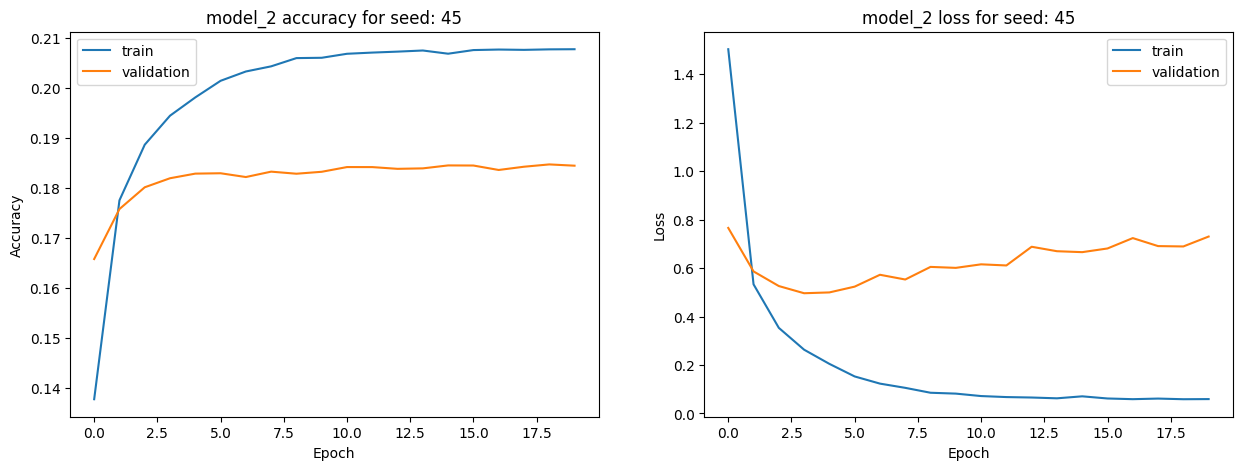

Scores for model_2 with seed: 45
Loss: 0.6574268937110901
Accuracy: 0.18617640435695648
Macro F1: 0.8543506821048517


In [ ]:
#plot the results
def plot_results(model_recaps: List[Dict[str, any]]):
    for model_recap in model_recaps:
        model_name = model_recap['name']
        seed = model_recap['seed']
        history = model_recap['history']
        scores = model_recap['scores']
        macro_f1 = model_recap['macro_f1']

        plt.figure(figsize=(15, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='train')
        plt.plot(history.history['val_accuracy'], label='validation')
        plt.title(f'{model_name} accuracy for seed: {seed}')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='validation')
        plt.title(f'{model_name} loss for seed: {seed}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()

        print(f"Scores for {model_name} with seed: {seed}")
        print(f"Loss: {scores[0]}")
        print(f"Accuracy: {scores[1]}")
        print(f"Macro F1: {macro_f1}")

plot_results(model_2_recap)

# Error analysis

In [ ]:
baseline_model = base_model_creator()

In [ ]:
def score_per_tag(y_true, y_pred):
    scores = {}
    '''first part of the function is the same as the macro_f1 function'''
    y_true = np.argmax(y_true, axis=-1)
    y_pred = np.argmax(y_pred, axis=-1)
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    temp = [] 
    temp_pred = []
    for i in range(len(y_true)):
        if y_true[i] not in punct_pos__idx and y_true[i] != 0:
            temp.append(y_true[i])
            temp_pred.append(y_pred[i])

    '''second part of the function calculates the f1 score for each tag'''
    tag_true = []
    tag_pred = []
    for el in pos_to_idx.keys():
        tag_true = []
        tag_pred = []
        for i in range(len(temp)):
            if temp[i] == pos_to_idx.get(el) and pos_to_idx.get(el) not in punct_pos__idx:
                tag_true.append(temp[i])
                tag_pred.append(temp_pred[i])
        if len(tag_pred) != 0 and len(tag_true) != 0:
            scores[el] = f1_score(tag_true, tag_pred, average='macro')
    return scores

In [ ]:
def get_scores_tag(scores):
    # return a list of scores and a list of tags
    scores_tags =  {pos_to_idx[key]: value for key, value in scores.items()}
    scores_tags = {key: value for key, value in scores_tags.items() if value < 1.0}
    scores_tags =  {pos_to_idx[key]: value for key, value in scores_tags.items()}
    return scores_tags

In [ ]:
model1 = mod_1_creator()

In [ ]:
baseline_test_pred = baseline_model.predict(X_test_pad)
baseline_val_pred = baseline_model.predict(X_val_pad)
scores_baseline_test = score_per_tag(y_test_cat, baseline_test_pred)
print(scores_baseline_test)
scores_baseline_val = score_per_tag(y_test_cat, baseline_val_pred)
print(scores_baseline_val)

mod1_test_pred = model1.predict(X_test_pad)
mod1_val_pred = model1.predict(X_val_pad)
scores_mod1_test = score_per_tag(y_test_cat, baseline_test_pred)
print(scores_baseline_test)
scores_mod1_val = score_per_tag(y_test_cat, baseline_val_pred)
print(scores_baseline_val)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step
{'nn': 0.03969390590599149, 'nnp': 0.053696612049302116, 'in': 0.06985603543743078, 'dt': 0.16598233171581436, 'nns': 0.054770318021201414, 'jj': 0.04430044961650357, 'vbd': 0.05625533731853117, 'rb': 0.05122513446597797, 'cd': 0.08651734738691261, 'vb': 0.07397206374188471, 'cc': 0.24897959183673468, 'vbz': 0.0776299112801014, 'to': 1.0, 'vbn': 0.05583992554676594, 'prp': 0.49869451697127937, 'vbg': 0.04259634888438134, 'vbp': 0.05895316804407714, 'md': 1.0, 'prp$': 1.0, 'pos': 1.0, "''": 1.0, 'wdt': 0.48502994011976047, 'jjr': 0.08503401360544217, 'wp': 1.0, 'rp': 0.20535714285714285, 'nnps': 0.027210884353741496, 'wrb': 0.31884057971014496, 'jjs': 0.20754716981132076, 'rbr': 0.14035087719298245, 'ex': 1.0, 'rbs': 1.0, 'pdt': 0.13333333333333333, 'wp$': 0.42857142857142855}
{'nn': 0.014117725496078872, 'nnp': 0.005262711145064086, 'in': 0.0044927805664001985, 'dt': 0.004654859218891917, 'nns': 0.0027878

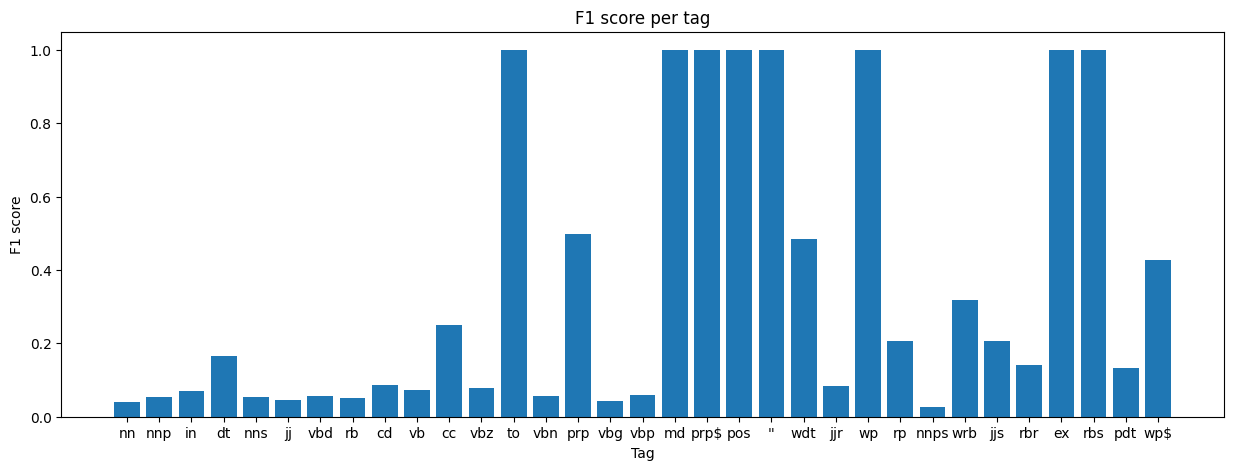

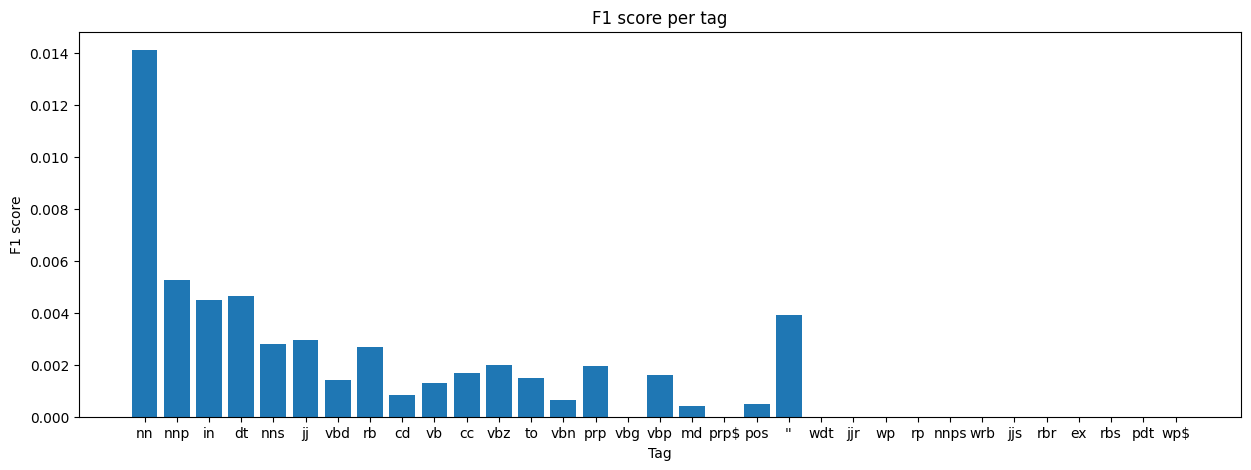

In [ ]:
#plot the scores
def plot_scores(scores):
    plt.figure(figsize=(15, 5))
    plt.bar(scores.keys(), scores.values())
    plt.title("F1 score per tag")
    plt.xlabel("Tag")
    plt.ylabel("F1 score")
    plt.show()

plot_scores(scores_baseline_test)
plot_scores(scores_baseline_val)

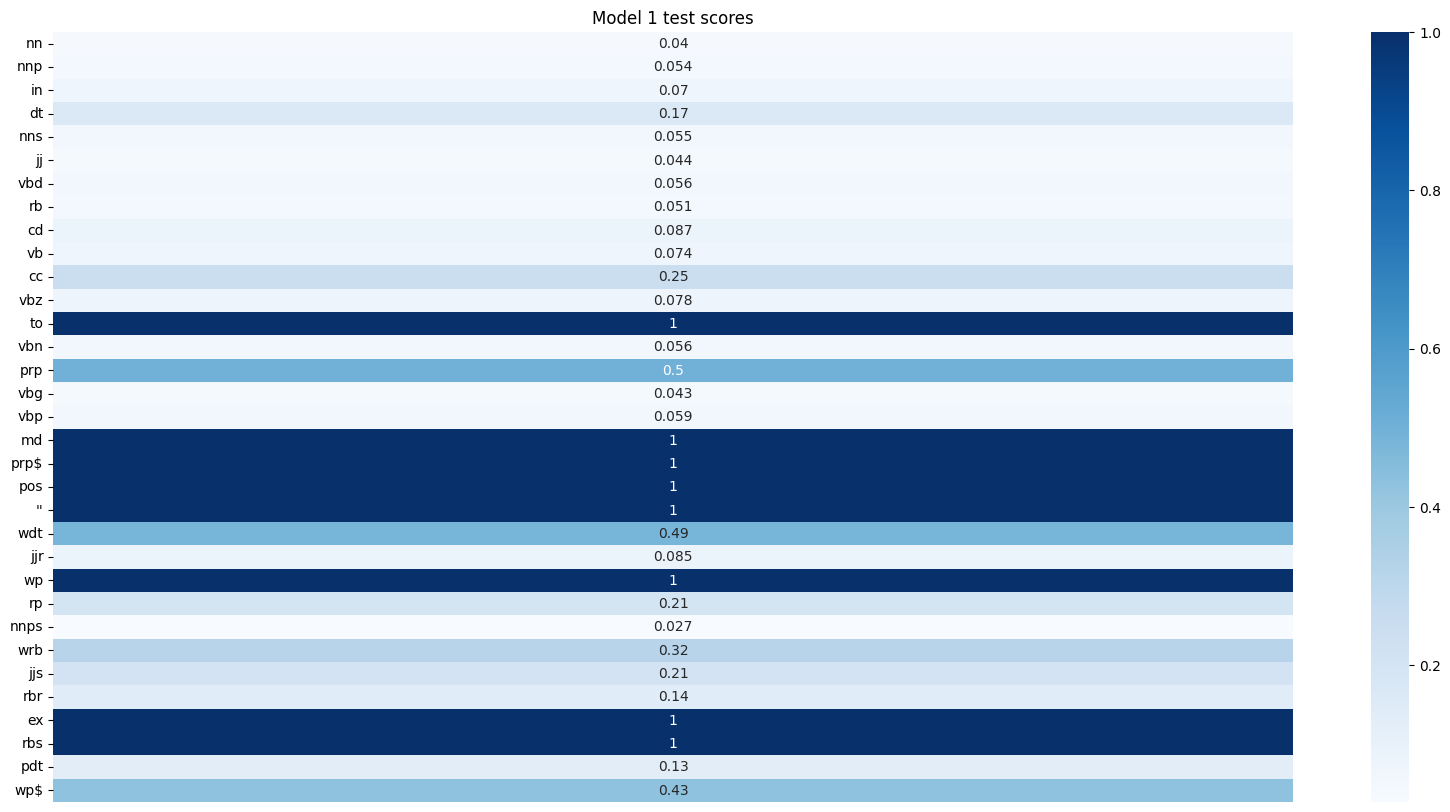

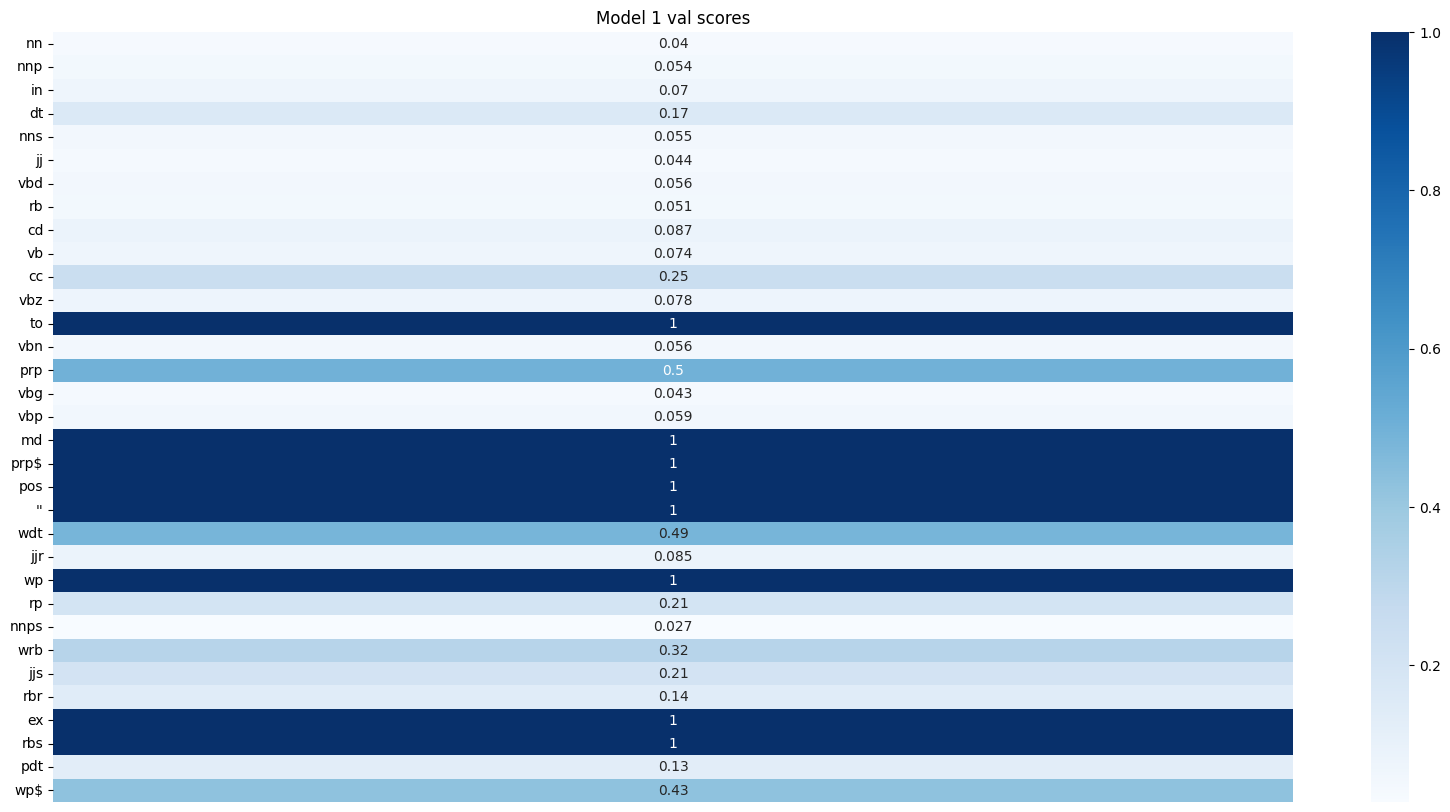

In [ ]:
# heatmap of the scores of model 1 on test set and validation set

# Test set
plt.figure(figsize=(20, 10))
sns.heatmap(pd.DataFrame(scores_baseline_test, index=[0]).T, annot=True, cmap='Blues')
plt.title('Model 1 test scores')
# hide x labels
plt.xticks([])
plt.show()

# Validation set
plt.figure(figsize=(20, 10))
sns.heatmap(pd.DataFrame(scores_baseline_test, index=[0]).T, annot=True, cmap='Blues')
plt.title('Model 1 val scores')
# hide x labels
plt.xticks([])
plt.show()

In [ ]:
print("Most difficult tag for the baseline model on test set: {}".format(max(scores_baseline_test, key=scores_baseline_test.get)))

print("Most difficult tag for the baseline model on validation set: {}".format(max(scores_baseline_val, key=scores_baseline_val.get)))


Most difficult tag for the baseline model on test set: to
Most difficult tag for the baseline model on validation set: nn


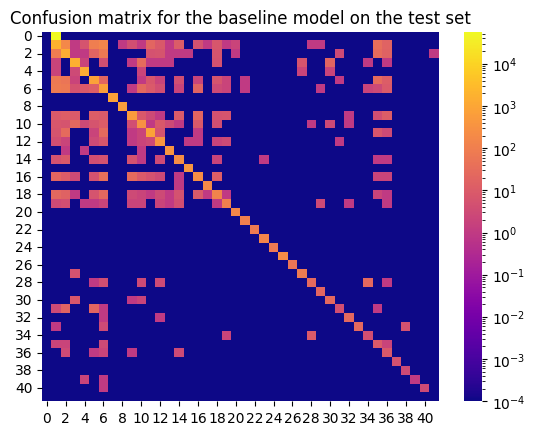

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LogNorm
def get_confusion_matrix(y_true, y_pred):
    y_true = np.argmax(y_true, axis=-1)
    y_pred = np.argmax(y_pred, axis=-1)
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    temp = [] 
    temp_pred = []
    for i in range(len(y_true)):
        temp.append(y_true[i])
        temp_pred.append(y_pred[i])
    return confusion_matrix(temp, temp_pred)

baseline_confusion_matrix_test = get_confusion_matrix(y_test_cat, baseline_test_pred)
baseline_confusion_matrix_test = baseline_confusion_matrix_test + 0.0001

sns.heatmap(baseline_confusion_matrix_test, annot=False, cmap='plasma', norm=LogNorm())
plt.title('Confusion matrix for the baseline model on the test set')

plt.show()


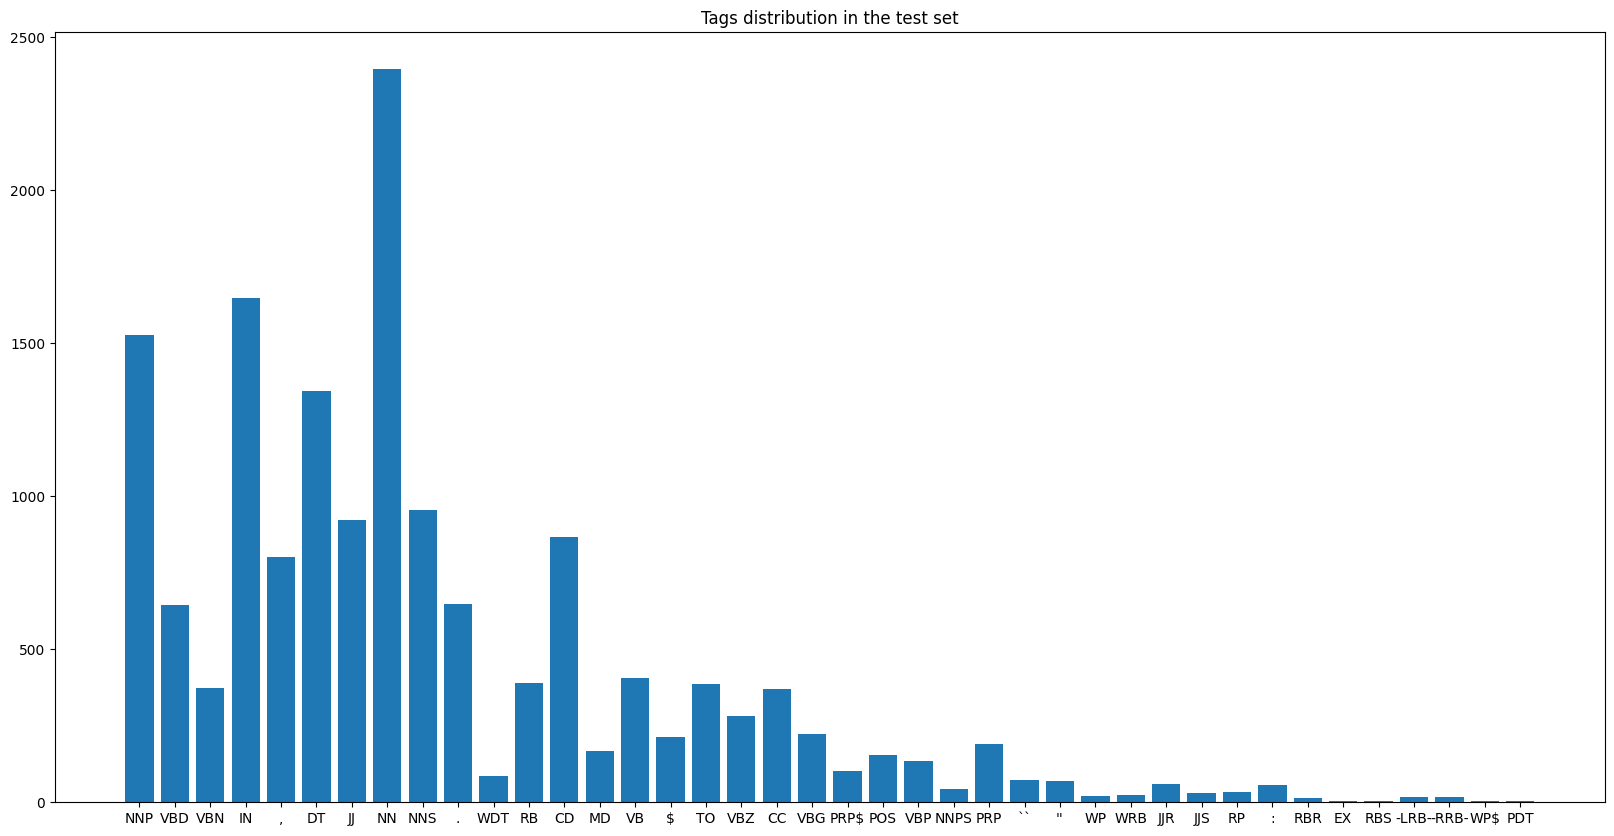

In [ ]:

from typing import Counter

count_tags = Counter()
for sentence in y_test_raw:
    for tag in sentence:
        count_tags[tag] += 1

# plot tags distribution in the test set
plt.figure(figsize=(20, 10))
plt.bar(count_tags.keys(), count_tags.values())
plt.title('Tags distribution in the test set')
plt.show()

In [ ]:
def get_most_least_frequent_tag(encoded_tags):
    temp = []
    for sentence in encoded_tags:
        for tag in sentence:
            if tag not in punct_pos__idx and tag != 0:
                temp.append(tag)
    # get the most frequent tag
    most_frequent_tag = Counter(temp).most_common(1)[0][0]
    print(f'Times the most frequent tag appears: {Counter(temp).most_common(1)[0][1]}')
    # get the least frequent tag
    least_frequent_tag = Counter(temp).most_common()[-1][0]
    print(f'Times the least frequent tag appears: {Counter(temp).most_common()[-1][1]}')
    return most_frequent_tag, least_frequent_tag



In [ ]:
print("Model 1 on test set:")
most_frequent_tag_test, least_frequent_tag_test = get_most_least_frequent_tag(y_test)
print("Most frequent tag: {}".format(idx_to_pos[most_frequent_tag_test]))
print("Least frequent tag: {}".format(idx_to_pos[least_frequent_tag_test]))
print("Model 1 performance on the most frequent tag: {}".format(scores_mod1_test[idx_to_pos[most_frequent_tag_test]]))
print("Model 1 performance on the least frequent tag: {}".format(scores_mod1_test[idx_to_pos[least_frequent_tag_test]]))

#add model 2

'''# plot scores for the most frequent and least frequent tag for each baseline on test set and validation set
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Scores for the most frequent and least frequent tag')
# Baseline
axs[0].bar(['Most frequent', 'Least frequent'], [scores_mod1_test[idx_to_pos[most_frequent_tag_test]], scores_mod1_test[idx_to_pos[least_frequent_tag_test]]], color=['#0000FF', '#FF0000'])
axs[0].set_title('Model 1 test')
axs[1].bar(['Most frequent', 'Least frequent'], [scores_mod1_val[idx_to_pos[most_frequent_tag_val]], scores_mod1_val[idx_to_pos[least_frequent_tag_val]]], color=['#0000FF', '#FF0000'])
axs[1].set_title('Model 1 val')
for ax in axs.flat:
    ax.set(xlabel='Tags', ylabel='Scores')
    # Distance more x labels from each other
    ax.xaxis.set_tick_params(pad=15)
plt.show()'''

Model 1 on test set:
Times the most frequent tag appears: 2396
Times the least frequent tag appears: 3
Most frequent tag: nn
Least frequent tag: rbs
Model 1 performance on the most frequent tag: 0.03969390590599149
Model 1 performance on the least frequent tag: 1.0


"# plot scores for the most frequent and least frequent tag for each baseline on test set and validation set\nfig, axs = plt.subplots(1, 2, figsize=(20, 5))\nfig.suptitle('Scores for the most frequent and least frequent tag')\n# Baseline\naxs[0].bar(['Most frequent', 'Least frequent'], [scores_mod1_test[idx_to_pos[most_frequent_tag_test]], scores_mod1_test[idx_to_pos[least_frequent_tag_test]]], color=['#0000FF', '#FF0000'])\naxs[0].set_title('Model 1 test')\naxs[1].bar(['Most frequent', 'Least frequent'], [scores_mod1_val[idx_to_pos[most_frequent_tag_val]], scores_mod1_val[idx_to_pos[least_frequent_tag_val]]], color=['#0000FF', '#FF0000'])\naxs[1].set_title('Model 1 val')\nfor ax in axs.flat:\n    ax.set(xlabel='Tags', ylabel='Scores')\n    # Distance more x labels from each other\n    ax.xaxis.set_tick_params(pad=15)\nplt.show()"

In [ ]:
# get specific missclassified samples for the model 1 

y_pred = model1.predict(X_test_pad)
y_pred = np.argmax(y_pred, axis=-1)
y_pred = y_pred.flatten()
y_true = np.argmax(y_test_cat, axis=-1)
y_true = y_true.flatten()

temp = []
for i in range(len(X_test)):
    for elem in y_test[i]:
        temp.append(elem)
# get the index of the missclassified samples

missclassified_samples = []
for i in range(len(y_true)):
    if y_true[i] != y_pred[i]:
        if y_true[i] not in punct_pos__idx and y_true[i] != 0:
            missclassified_samples.append(i)
 
# create a table with the missclassified samples: word, true tag, predicted tag for the first 10 samples
sample_dict = {}
for i in range(10):
    sample_dict[i] = [train_tokenizer.sequences_to_texts([missclassified_samples[i:i+1]]), idx_to_pos[y_true[missclassified_samples[i]]], idx_to_pos[y_pred[missclassified_samples[i]]]]

# create a dataframe from the dictionary
df = pd.DataFrame.from_dict(sample_dict, orient='index', columns=['Word', 'True tag', 'Predicted tag'])
print(df)

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step
    Word True tag Predicted tag
0     []       nn             $
1    [,]       nn             $
2  [the]       nn             $
3   [of]       to            in
4   [to]      nnp            in
5    [a]       nn            in
6   [in]       nn             #
7  [and]       jj           nnp
8  [for]       nn             $
9   ['s]       nn             $
